# Coursework 1: Train a Sentiment Analysis Classifier
In this course work, you are asked to train a sentiment analysis classifier for movie reviews. The sample code below builds a simple classifier that uses tf-idf to vectorize text and a logistic regression model to make predictions.

In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import MWETokenizer
from nltk.corpus  import stopwords
from nltk.stem import PorterStemmer

In [2]:
# load data and take a quick look
import pandas as pd
raw_data = pd.read_csv('coursework1_train.csv')
raw_data.head()

Unnamed: 0                                               text sentiment
0           0  Enjoy the opening credits. They're the best th...       neg
1           1  Well, the Sci-Fi channel keeps churning these ...       neg
2           2  It takes guts to make a movie on Gandhi in Ind...       pos
3           3  The Nest is really just another 'nature run am...       neg
4           4  Waco: Rules of Engagement does a very good job...       pos

Percentage for default

pos    50.0
neg    50.0
Name: sentiment, dtype: float64


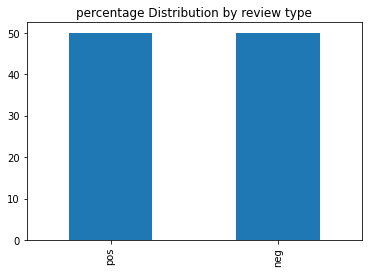

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for default\n")
print(round(raw_data.sentiment.value_counts(normalize=True)*100,2))
round(raw_data.sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("percentage Distribution by review type")
plt.show()

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40000 non-null  int64 
 1   text        40000 non-null  object
 2   sentiment   40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


# Cleaning and Tokenizing  the data 

In [5]:
import re
import string
def clean(text):
    #text=re.sub("[^a-zA-Z]","",str(strtoreplace))
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    text=re.sub(r'[^\w\s]','',text) 
    
    #implimenting Tokenization here 
    text=nltk.word_tokenize(text)
    
    return text
clean1=lambda x: clean(x)

In [6]:
raw_data['cleaned']=pd.DataFrame(raw_data.text.apply(clean1))
raw_data.head()

Unnamed: 0                                               text sentiment  \
0           0  Enjoy the opening credits. They're the best th...       neg   
1           1  Well, the Sci-Fi channel keeps churning these ...       neg   
2           2  It takes guts to make a movie on Gandhi in Ind...       pos   
3           3  The Nest is really just another 'nature run am...       neg   
4           4  Waco: Rules of Engagement does a very good job...       pos   

                                             cleaned  
0  [enjoy, the, opening, credits, theyre, the, be...  
1  [well, the, scifi, channel, keeps, churning, t...  
2  [it, takes, guts, to, make, a, movie, on, gand...  
3  [the, nest, is, really, just, another, nature,...  
4  [waco, rules, of, engagement, does, a, very, g...

# stop word removal and Lemmitization 

In [7]:
#stopword Removal
tokenize_docs_no_stopwords= []
wordnet=WordNetLemmatizer()

for doc in raw_data["cleaned"]:
    final_doc =[]
    for word in doc:
        if not word in stopwords.words('english'):
            #Applying Lemmatization
            final_doc.append(wordnet.lemmatize(word))
    tokenize_docs_no_stopwords.append(final_doc)
raw_data["cleaned"]=tokenize_docs_no_stopwords

In [8]:
#To implement data in the model i did some convertion 
df=pd.DataFrame(raw_data)
df['pure']=df['cleaned'].astype(str)
raw_data.head()

Unnamed: 0                                               text sentiment  \
0           0  Enjoy the opening credits. They're the best th...       neg   
1           1  Well, the Sci-Fi channel keeps churning these ...       neg   
2           2  It takes guts to make a movie on Gandhi in Ind...       pos   
3           3  The Nest is really just another 'nature run am...       neg   
4           4  Waco: Rules of Engagement does a very good job...       pos   

                                             cleaned  \
0  [enjoy, opening, credit, theyre, best, thing, ...   
1  [well, scifi, channel, keep, churning, turkey,...   
2  [take, gut, make, movie, gandhi, india, shown,...   
3  [nest, really, another, nature, run, amock, ho...   
4  [waco, rule, engagement, good, job, drawing, c...   

                                                pure  
0  ['enjoy', 'opening', 'credit', 'theyre', 'best...  
1  ['well', 'scifi', 'channel', 'keep', 'churning...  
2  ['take', 'gut', 'make', 'movie', 'gandhi', 'in...  
3  ['nest', 'really', 'another', 'nature', 'run',...  
4  ['waco', 'rule', 'engagement', 'good', 'job', ...

In [9]:
# check the size of the data and its class distribution
all_text = raw_data['text'].tolist()
all_lables = raw_data['sentiment'].tolist()

print('entry num', len(all_text))
print('num of pos entries', len([l for l in all_lables if l=='pos']))
print('num of neg entries', len([l for l in all_lables if l=='neg']))

entry num 40000
num of pos entries 20000
num of neg entries 20000


# Data Split 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

entry=raw_data.pure
target=raw_data.sentiment
X_train,X_test,y_train,y_test=train_test_split(entry,target,test_size=0.25,random_state=112)
print('train_i/p',X_train.shape)
print('test_i/p',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)
from sklearn.feature_extraction.text import TfidfVectorizer # TFIDf
from sklearn.feature_extraction.text import CountVectorizer #Bags of words
from sklearn.linear_model import LogisticRegression #regression 
from sklearn.naive_bayes import MultinomialNB #Naive Bayes Classifier
from sklearn.linear_model import SGDClassifier #SVM

#For Implementing bag of words 
vect=CountVectorizer()
#for Implementing TF-IDF
tfidf = TfidfVectorizer()



train_i/p (30000,)
test_i/p (10000,)
train_labels (30000,)
test_labels (10000,)


# linear SVM + Tf-Idf

In [19]:
clf=SGDClassifier()
sgd = Pipeline([('vectorizer', tfidf),('classifier',clf)])


LSVM=sgd.fit(X_train, y_train)
#%%time

y_pred = sgd.predict(X_test)
print('accuracy in linear SVM %s' % accuracy_score(y_pred, y_test))
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(y_pred, y_test)
pre, rec, f1, _ = precision_recall_fscore_support(y_test,y_pred,average='macro')
print('precision', pre)
print('rec', rec)
print('f1', f1)

accuracy in linear SVM 0.8893
precision 0.8899301427078216
rec 0.8893
f1 0.8892552580167914


# linear SVM + BOW

In [20]:
clf=SGDClassifier()
sgd = Pipeline([('vectorizer', vect),('classifier',clf)])

sgd.fit(X_train, y_train)
#%%time

y_pred = sgd.predict(X_test)
print('accuracy  linear SVM with BOW %s' % accuracy_score(y_pred, y_test))
pre, rec, f1, _ = precision_recall_fscore_support(y_test,y_pred,average='macro')
print('precision', pre)
print('rec', rec)
print('f1', f1)

accuracy  linear SVM with BOW 0.8708
precision 0.871189660057542
rec 0.8708
f1 0.8707660838510458


# Naive Bayes Classifier + Tf-Idf

In [21]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()
nb = Pipeline([('vectorizer', tfidf),('classifier',clf)])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy Naive Bayes Classifier%s' % accuracy_score(y_pred, y_test))
pre, rec, f1, _ = precision_recall_fscore_support(y_test,y_pred,average='macro')
print('precision', pre)
print('rec', rec)
print('f1', f1)

accuracy Naive Bayes Classifier0.8643
precision 0.8646875753675977
rec 0.8643000000000001
f1 0.8642639362852316


# Naive Bayes Classifier + BOW

In [22]:

clf=MultinomialNB()
nb = Pipeline([('vectorizer', vect),('classifier',clf)])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy Naive Bayes Classifier%s' % accuracy_score(y_pred, y_test))
pre, rec, f1, _ = precision_recall_fscore_support(y_test,y_pred,average='macro')
print('precision', pre)
print('rec', rec)
print('f1', f1)

accuracy Naive Bayes Classifier0.8552
precision 0.8555825499305172
rec 0.8552
f1 0.8551610441144251


In [23]:
# data split. 
# Feel free to use differnt raios or strategies to split the data.
train_text = all_text[:30000]
train_labels = all_lables[:30000]
test_text = all_text[30000:]
test_labels = all_lables[30000:]

In [24]:
# training: tf-idf + logistic regression
# you should explore different representations and algorithms.
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 1000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = train_vectorizer.fit_transform(train_text)
test_vecs = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

acc 0.8582
precision 0.858202195811162
rec 0.8582044883231885
f1 0.858199909247942


# In my case linear SVM with Tf-Idf i got 89% accuracy ,so i will go for it 

## SAVE YOUR TRAINED MODEL
After you have found the best model, save your trained model and other necessary components (e.g. vocabulary, vectorizer) to a file. We will load your model from the saved file and apply your trained model on some held-out test data. **At submission time, you should submit the saved model file and we will NOT re-run your code to train your model; instead, we will directly use your trained model to run test (see notebook *cw1-test.ipynb*)**. 

Below is a sample code for saving the model (and other necessary components) obtained above, using the *pickle* package in Python. *You should adjust the code to save all the necessary components for re-running your model!*

In [28]:
import pickle

# save model and other necessary modules
all_info_want_to_save = {
    'model': LSVM,
    'vectorizer': TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_),
}

with open("sample_trained_model.pickle","wb") as save_path:
    pickle.dump(all_info_want_to_save, save_path)

In *cw1-test.ipynb*, we provide a sample code to illustrate how to re-load your saved model and apply it to some test data. 